<h1 style="font-size:36px;">Convolutional Neural Network(CNN)</h1>

CNN architecture includes several convolutional layers followed by several fully connected layers. A matrix of Bitcoin price data over the time range is used as input. Convolutional layers create feature maps by acting on the input matrix of the filters. Fully connected layers flatten the feature maps and render them into the output layer. When this architecture is used for Bitcoin price prediction, it allows to learn visual features of historical price data and use these features to predict future prices.

CNN mimarisi, birkaç evrişimli katman ve ardından birkaç tam bağlantılı katman içerir. Girdi olarak, zaman aralığındaki Bitcoin fiyat verilerinin bir matrisi kullanılır. Evrişimli katmanlar, filtrelerin girdi matrisi üzerinde hareket ederek özellik haritalarını oluşturur. Tam bağlantılı katmanlar, özellik haritalarını düzleştirir ve çıktı katmanına doğru işler. Bu mimari, Bitcoin fiyat tahmini için kullanıldığında, geçmiş fiyat verilerinin görsel özelliklerini öğrenmeyi ve bu özelliklerin gelecekteki fiyatları tahmin etmek için kullanılmasını sağlar.

Model 1 uses a Conv1D layer with 58 input properties and then halves the size using a MaxPooling1D layer. It then creates an intermediate output using a Dense layer, and finally uses a Dense layer containing a single output neuron, the output layer. Model 1 has 104,761 trainable parameters.

Model 1, 58 adet girdi özelliğine sahip bir Conv1D katmanı kullanır ve ardından bir MaxPooling1D katmanı kullanarak boyutu yarıya indirir. Daha sonra, bir Yoğun katmanı kullanarak bir ara çıktı oluşturur ve son olarak, çıkış katmanı olan tek bir çıktı nöronu içeren bir Yoğun katman kullanır. Model 1, 104,761 eğitilebilir parametreye sahiptir.


<h3 style="font-size:24px;">Data preprocessing and Preparation</h3>

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_squared_error
from keras.callbacks import History
import math
import yfinance as yf

In [2]:
btc = yf.Ticker("BTC-USD").history(period='max', interval='1d')
btc.reset_index(inplace=True)
close_btc = btc.Close.values
close_btc     

array([  457.33401489,   424.44000244,   394.79598999, ...,
       27129.5859375 , 26753.82617188, 26909.51757812])

In [3]:
btc.reset_index(inplace=True)

In [4]:
btc

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3165,3165,2023-05-18 00:00:00+00:00,27401.650391,27466.527344,26415.101562,26832.208984,15222938600,0.0,0.0
3166,3166,2023-05-19 00:00:00+00:00,26826.753906,27128.619141,26700.210938,26890.128906,11258983301,0.0,0.0
3167,3167,2023-05-20 00:00:00+00:00,26888.841797,27155.158203,26843.277344,27129.585938,7044911360,0.0,0.0
3168,3168,2023-05-21 00:00:00+00:00,27118.423828,27265.917969,26706.921875,26753.826172,8647416921,0.0,0.0


In [5]:

X = []
y = []
inp_num = 60

for i in range(inp_num, len(close_btc)):
    X.append(close_btc[i-inp_num:i])
    y.append(close_btc[i])

X = np.array(X)
y = np.array(y)

In [6]:
split = int(len(X) * 0.8)
X_train = X[:split]
y_train = np.array(y[:split])
X_test = X[split:]
y_test = np.array(y[split:])

In [7]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [8]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation="relu", input_shape=(inp_num, 1)))
model.add(Conv1D(filters=32, kernel_size=5, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(60, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 56, 64)            384       
                                                                 
 conv1d_1 (Conv1D)           (None, 52, 32)            10272     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 26, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 832)               0         
                                                                 
 dense (Dense)               (None, 60)                49980     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                        

In [10]:

hist = History() # Used to record loss per epoch
model.fit(X_train, y_train, epochs=50, batch_size = 32, callbacks=[hist])

Epoch 1/50
78/78 [==============================] - 1s 3ms/step - loss: 227360032.0000
Epoch 2/50
78/78 [==============================] - 0s 3ms/step - loss: 39497736.0000
Epoch 3/50
78/78 [==============================] - 0s 3ms/step - loss: 16107622.0000
Epoch 4/50
78/78 [==============================] - 0s 3ms/step - loss: 13053992.0000
Epoch 5/50
78/78 [==============================] - 0s 3ms/step - loss: 11144892.0000
Epoch 6/50
78/78 [==============================] - 0s 3ms/step - loss: 10034949.0000
Epoch 7/50
78/78 [==============================] - 0s 3ms/step - loss: 9277967.0000
Epoch 8/50
78/78 [==============================] - 0s 3ms/step - loss: 8603028.0000
Epoch 9/50
78/78 [==============================] - 0s 3ms/step - loss: 8072905.5000
Epoch 10/50
78/78 [==============================] - 0s 3ms/step - loss: 7300474.0000
Epoch 11/50
78/78 [==============================] - 0s 3ms/step - loss: 7057364.5000
Epoch 12/50
78/78 [==============================] - 0s 

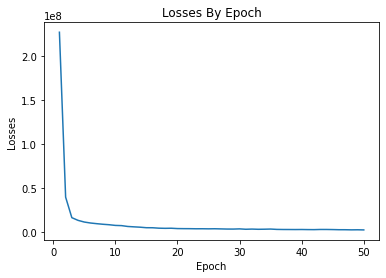

In [12]:
losses = hist.history['loss']
plt.plot(np.arange(1, len(losses) + 1),losses)
plt.title("Losses By Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.show()

In [13]:

yhat = model.predict(X_test)
yhat = yhat.reshape(yhat.shape[0],)

20/20 [==============================] - 0s 1ms/step


In [14]:

mse = math.sqrt(mean_squared_error(y_test, yhat))
print("RMSE = " + str(mse))

RMSE = 2576.5717518018255


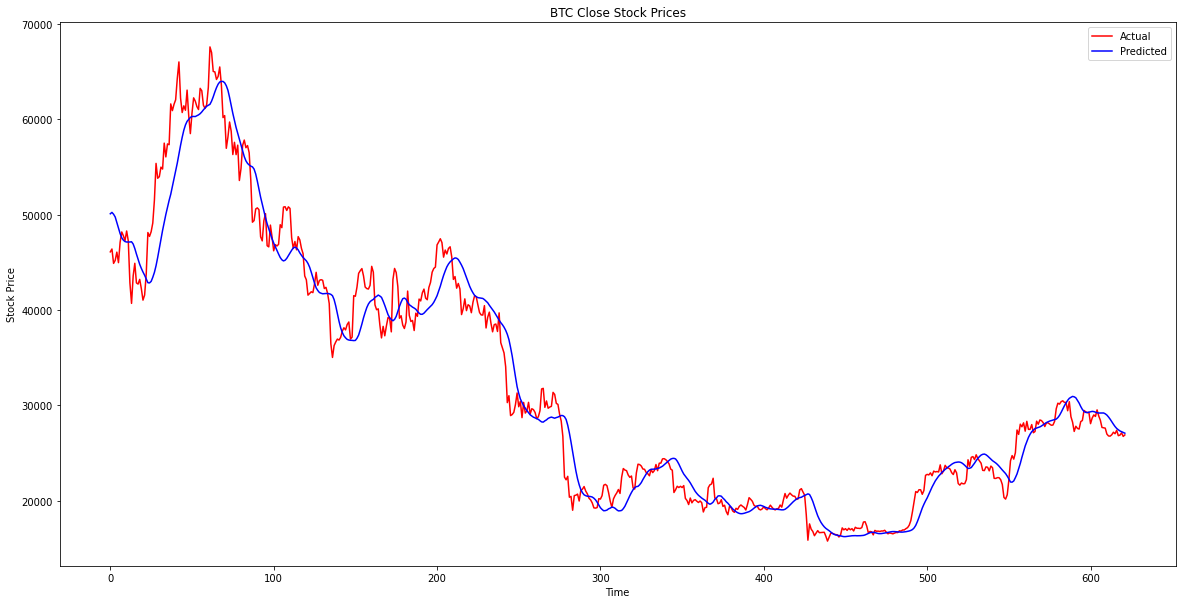

In [15]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color="red", label="Actual")
plt.plot(yhat, color = "blue", label = "Predicted")
plt.title("BTC Close Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [16]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
MSE = math.sqrt(mean_squared_error(y_test, yhat))
RMSE =np.sqrt(mse)
print(MSE)
print(RMSE)

2576.5717518018255
50.759942393602316


In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
MAE = mean_absolute_error(y_test, yhat)
print('MAE:', MAE)
R2 = r2_score(y_test, yhat)
print('R2:', R2)

MAE: 1820.1126940564711
R2: 0.9631627403175984


In [18]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNN2_ERROR= pd.DataFrame.from_dict(results, orient='index').T

# DataFrame'i ERROR ismiyle kaydet
CNN2_ERROR = CNN2_ERROR.to_string(index=False)

# ERROR'u yazdır

print(CNN2_ERROR)

        MSE      RMSE         MAE       R2
2576.571752 50.759942 1820.112694 0.963163


In [19]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNN2_ERROR = pd.DataFrame.from_dict(results, orient='index').T

# Çıktıyı metin dosyasına aktar
output_text = CNN2_ERROR.to_string(index=False)

# Metin dosyasını kaydet
with open('CNN2_ERROR.txt', 'w') as file:
    file.write(output_text)
